In [1]:
import math

In [2]:
Vr = -60
Vm0 = -60
Na_in_concentration = 49.5 # mM
Na_ex_concentration = 437.0 # mM
K_in_concentration = 397 # mM
K_ex_concentration = 29 # mM

EK = -72.100 # mV 
ENa = 52.4 
EL = -49.187

Cm = 1.0 # micro Farad / cm^2

T = 6.3 # Kelvin

n0 = 0.31768
m0 = 0.05293
h0 = 0.59612

gK_max = 36.0 # mS / cm^2
gNa_max = 120.0
gL = 0.3
gK = 0.367
gNa = 0.011

R = 8.3145 # constante dos gases perfeitos J * K^⁻1 * mol^-1
F = 96485 # 96485.332 constante de faraday C / mol
e = 2.718281

In [3]:
time = 15 # 10 msec 
delta_t = 0.01 # msec
total_time_deltas = int(time / delta_t)

Is_begin = 2
Is = 53
Is_duration = 0.2

Ims = [0] * total_time_deltas

Is_start_index = int(Is_begin / delta_t)
Is_finish_index = int((Is_begin + Is_duration) / delta_t)

Ims = [0 if x < Is_start_index or x > Is_finish_index else Is for x in range(0, total_time_deltas)]


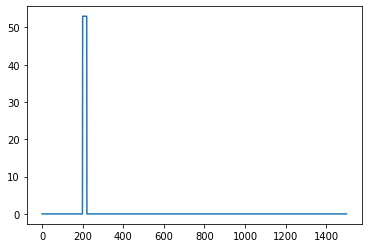

In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(Ims)
plt.show()

In [5]:
def NernstPotential(q_in_conc, q_ex_conc, z, temp, temp_unit):
    if temp_unit != "K":
        if temp_unit == "C":
            temp = CelsiusToKelvin(temp)
            
        elif temp_unit == "F":
            temp = FahrenheitfToKelvin(temp)
        else:
            print("Wrong temperature unit: K, C or F")
          
    print(temp)
    a = q_in_conc / q_ex_conc
    return -1000*R*temp/(1*F)* math.log(a)
    
    
def CelsiusToKelvin(temp):
    return temp + 273.15

def FahrenheitfToKelvin(temp):
    return 273.5 + ((temp - 32.0) * (5.0/9.0))

In [22]:
ENa = NernstPotential(Na_in_concentration, Na_ex_concentration, 1, T, "C")
ENa

279.45


52.44818388360987

In [26]:
a = NernstPotential(K_in_concentration, K_ex_concentration, 1, T, "C");
a

279.45


-63.01217947135065

In [21]:
NernstPotential(0.22, 0.02, 1, 26.85, "C") # must be aprox -62

300.0


-61.9908801752046

In [8]:
vM = 0

alpha_n = .01 * ((10-vM) / (math.exp((10-vM)/10)-1))
beta_n = .125*math.exp(-vM/80)

alpha_m = .1*((25-vM) / (math.exp((25-vM)/10)-1))
beta_m = 4*math.exp(-vM/18)

alpha_h = .07*math.exp(-vM/20)
beta_h = 1/(math.exp((30-vM)/10)+1)


print("%s, %s" % (alpha_n, beta_n))
print("%s, %s" % (alpha_m, beta_m))
print("%s, %s" % (alpha_h, beta_h))

0.05819767068693265, 0.125
0.22356372458463003, 4.0
0.07, 0.04742587317756678


In [9]:
n = alpha_n / (alpha_n + beta_n)
m = alpha_m / (alpha_m + beta_m)
h = alpha_h / (alpha_h + beta_h)

print(n, m, h)

0.3176769140606974 0.05293248525724958 0.5961207535084603


In [10]:
print(gK)
gK = gK_max * n**4
gNa = gNa_max * h * m**3

0.367


In [11]:
INa = gNa * (vM + Vr - ENa)
IK = gK * (vM + Vr - EK)
IL = gL * (vM + Vr - EL)

Iion = INa + IK + IL 

In [12]:
Vm0 = -60
Vmr = -60

ns = [0] * total_time_deltas
ms = [0] * total_time_deltas
hs = [0] * total_time_deltas
vms = [0] * total_time_deltas
Vms = [0] * total_time_deltas

ns[0] = n
ms[0] = m
hs[0] = h
vms[0] = Vm0 - Vmr
Vms[0] = Vm0

In [13]:
[alpha_n, beta_n, alpha_m, beta_m, alpha_h, beta_h]

[0.05819767068693265,
 0.125,
 0.22356372458463003,
 4.0,
 0.07,
 0.04742587317756678]

In [14]:
[n, m, h]

[0.3176769140606974, 0.05293248525724958, 0.5961207535084603]

In [15]:
[gK, gNa, gL]

[0.3666444556069115, 0.010609192838829854, 0.3]

In [16]:
for i in range(total_time_deltas-1):
    vM = Vms[i] - Vr
    alpha_n = 0.1 if vM == 10 else .01 * ((10-vM) / (math.exp((10-vM)/10)-1))
    beta_n = .125*math.exp(-vM/80)

    alpha_m = 0.0 if vM == 25 else .1*((25-vM) / (math.exp((25-vM)/10)-1)) 
    beta_m = 4*math.exp(-vM/18)

    alpha_h = .07*math.exp(-vM/20)
    beta_h = 1/(math.exp((30-vM)/10)+1)
    
    gK = gK_max * ns[i]**4
    gNa = gNa_max * hs[i] * ms[i]**3
    
    INa = gNa * (Vms[i] - ENa)
    IK = gK * (Vms[i] - EK)
    IL = gL * (Vms[i] - EL)
    
    I = Ims[i] - IK - INa - IL
    
    Vms[i+1] = Vms[i] + delta_t * I / Cm
    ns[i+1] = ns[i] + delta_t * (alpha_n * (1 - ns[i]) - beta_n * ns[i])
    ms[i+1] = ms[i] + delta_t * (alpha_m * (1 - ms[i]) - beta_m * ms[i])
    hs[i+1] = hs[i] + delta_t * (alpha_h * (1 - hs[i]) - beta_h * hs[i])
    

In [17]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

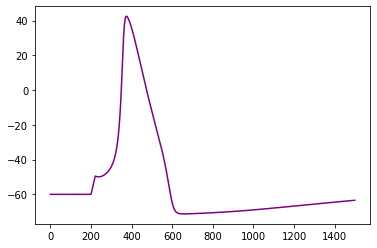

In [18]:
plt.plot(Vms, color="purple")
plt.show()

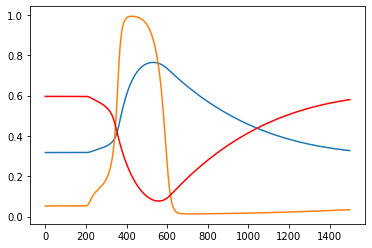

In [20]:
plt.plot(ns)
plt.plot(ms)
plt.plot(hs, color="red")
plt.show()